In [27]:
# Environment Setup 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve,roc_auc_score,accuracy_score, confusion_matrix, classification_report, roc_auc_score


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



 Missing Values
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

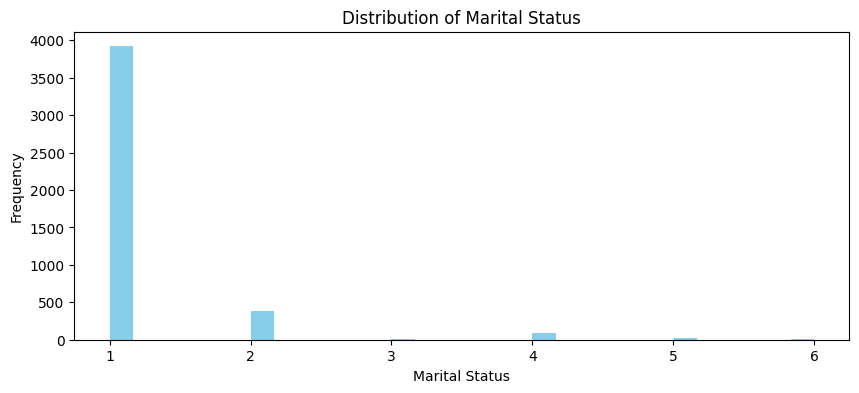

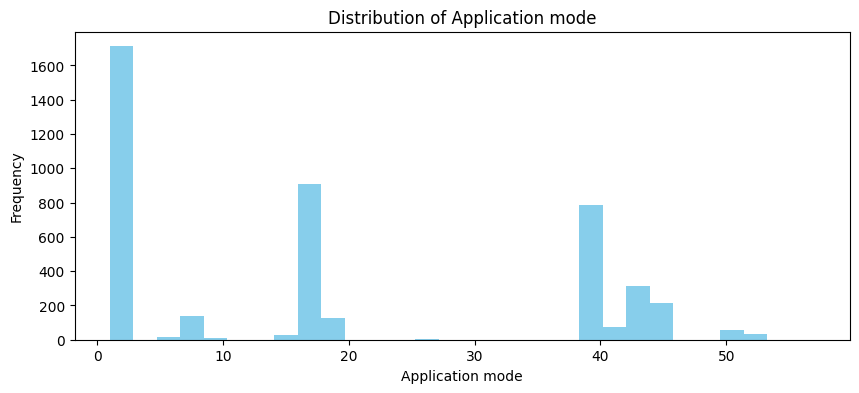

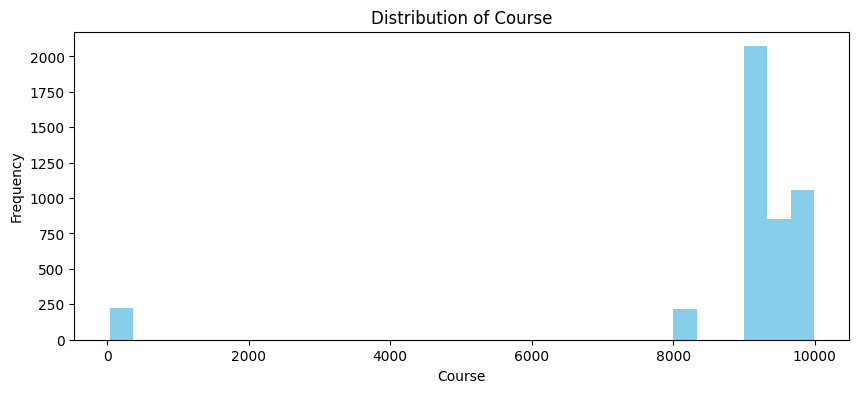

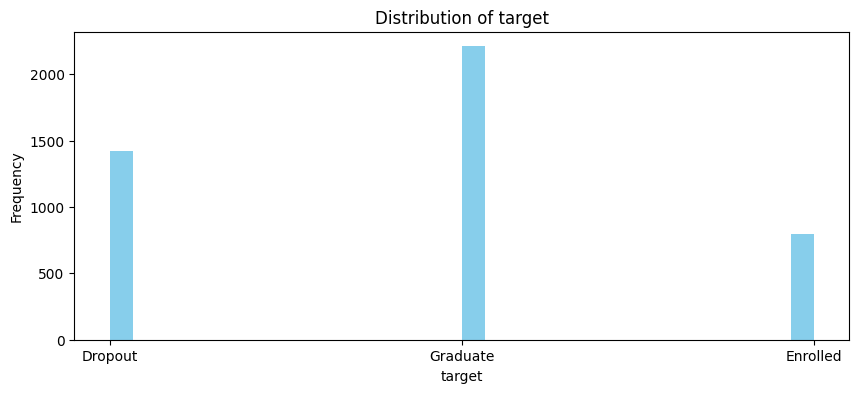

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

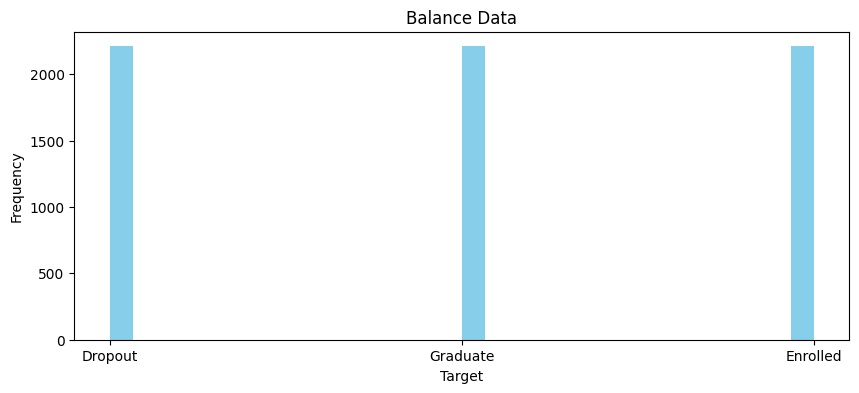

In [ ]:
# Data Loading
data = pd.read_csv('students_dropout_academic_success.csv')
display(data.head())

print("\n Missing Values")
print(data.isnull().sum())

feature = data[['Marital Status','Application mode','Course','target']]

for col in feature.columns:
    plt.figure(figsize=(10,4))
    plt.hist(data[col], bins=30,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

X = data.drop(columns=['target'])
y = data['target']

print(data.columns)

print(y.value_counts()) 

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

df = pd.concat([y_res])

print(y_res.value_counts())

df = X_res.copy()
df['target'] = y_res

plt.figure(figsize=(10,4))
plt.hist(df['target'],bins=30,color='skyblue')
plt.title('Balance Data')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


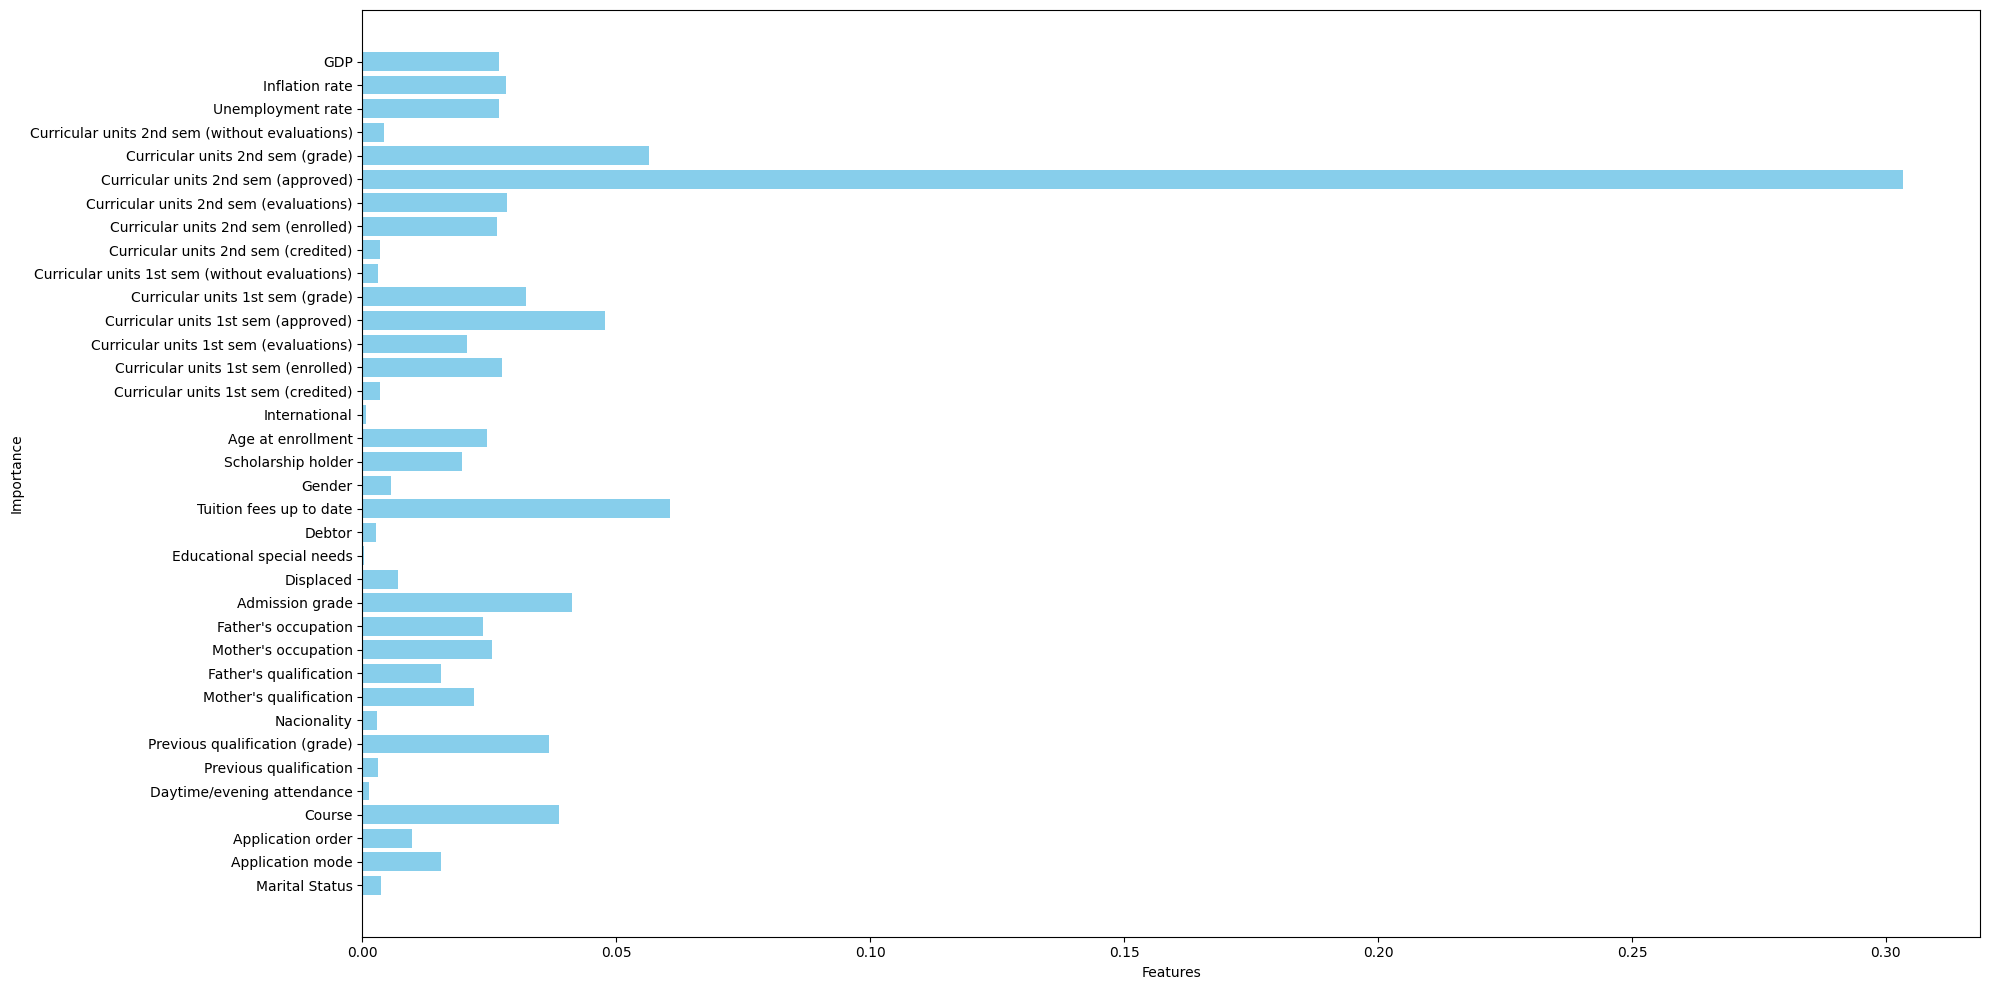

In [29]:
X = df.drop(columns=['target'])
y = df['target']

tree = DecisionTreeClassifier()
tree.fit(X,y)

importance = tree.feature_importances_
if importance is not None:
    importance_df = pd.DataFrame({'Feature':X.columns,'Importance':tree.feature_importances_})
importance_df

plt.figure(figsize=(20,10))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Best Parameters:
{'max_depth': 10, 'max_samples': 0.7, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report
              precision    recall  f1-score   support

     Dropout       0.79      0.68      0.73       681
    Enrolled       0.64      0.61      0.62       650
    Graduate       0.69      0.82      0.75       658

    accuracy                           0.70      1989
   macro avg       0.70      0.70      0.70      1989
weighted avg       0.71      0.70      0.70      1989



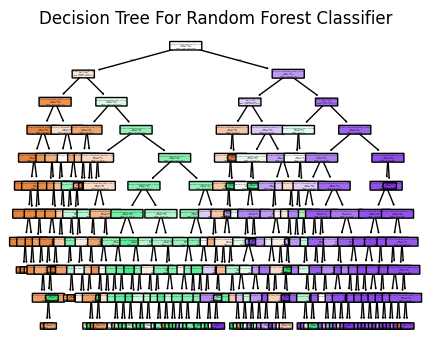

In [33]:
X = df[['Curricular units 2nd sem (approved)','Tuition fees up to date','Curricular units 2nd sem (grade)']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

para_dist = {
    'n_estimators': [100,500],
    'max_depth' : [None, 10,20],
    'min_samples_split': [2,10],
    'max_samples': [0.7, 1.0]
}


model = RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1, bootstrap=True)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=para_dist,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

print("Best Parameters:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

CF_report = classification_report(y_test,y_pred)
# ROC_AUC_SCORE = roc_auc_score(y_test,y_pred)
# print(ROC_AUC_SCORE)
print("Classification Report")
print(CF_report)

plt.figure(figsize=(5,4))
plot_tree(best_rf.estimators_[0],feature_names=X.columns,class_names=best_rf.classes_,filled=True,rounded=True)
plt.title('Decision Tree For Random Forest Classifier')
plt.show()

df["Prediction"] = best_rf.predict(X)
df["Prediction_prob"] = best_rf.predict_proba(X)[:,1]

df.to_csv("predcition.csv",index=False)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaaled = scaler.transform(X_test)

para_grid = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(
    SVC(), para_grid, refit= True, verbose=3
)
grid.fit(X_train_scaled,y_train)

print("Best Parameter")
print(grid.best_params_)

best_sv = grid.best_estimator_
y_pred = best_sv.predict(X_test_scaaled)

print("Classification Report")
CR = classification_report(y_test,y_pred)
print(CR)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.718 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.692 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf